 <img align="right" src="img/PhUniMa_Logo_sw.svg">

**Phillips-Universität Marburg** <br>
**Fachbereich Physik**<br>
*Projekt Picard*<br>
19.11.2020

<h1><center><br>Central Limit Theorem</center></h1>

---

This notebook is intended to show an intuitive way to understand the <a href="https://en.wikipedia.org/wiki/Central_limit_theorem">Central Limit Theorem</a> (CLT). For this purpose, consider a common die with 6 faces. Throwing the die will result in a number with a random value between 1 and 6. Due to this randomness, we will call this result "random variable".

Let's write a function that simulates the throw of the die:

In [ ]:
# First import some useful modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Function that returns a random integer between 1 and 6. The parameter throw_amount is the amount of throws.
def throw_die(throw_amount=1):
    return np.random.randint(1,7,throw_amount)

Now check the distribution using a histogram for many throws:

In [ ]:
N = 60000 # Amount of throws
throws = throw_die(N)

# Plot
fig = plt.figure()
ax = plt.axes()
plt.hist(throws,np.linspace(0.5,6.5,7))#,density=True)
ax.set_title("Probability distribution of 1 die")
plt.show()

As shown in the histogram, every number has the same probability, this is called "uniform distribution". Each one has a probability $\frac{1}{6} \approx 0.16$ to fall.

Let's see how the probability distribution of the sum of 2 dice looks like.

In [ ]:
N = 100000 # Amount of throws
throws = throw_die(N) + throw_die(N) # Sum 2 dice

# Plot
fig = plt.figure()
ax = plt.axes()
plt.hist(throws,np.linspace(1.5,12.5,12),density=True)
ax.set_title("Probability distribution of 2 die");

Why is the distribution is not uniform anymore? Let's how likely is every result to be obtained. The following is a table that shows the sum for every possible configuration.

In [ ]:
die_value = np.arange(1,7)
result_every_config = np.meshgrid(die_value, die_value)

result_every_config[1]+result_every_config[0]

In the table one can see, that 2 has only a probability of $\frac{1}{36} = 0.027$ of be obtained, as well as 12. The number with the biggest probability is the one in the secondary diagonal, which is 7, with $\frac{6}{36} = 0.16$.

This explains why the histogram now has a triangular shape. Let's find out how does it look for more dice, 3 for instance.

In [ ]:
N = 100000 # Amount of throws
throws = throw_die(N) + throw_die(N) + throw_die(N) # Sum 3 dice

# Plot
fig = plt.figure()
ax = plt.axes()
plt.hist(throws,np.linspace(2.5,18.5,17),density=True)
ax.set_title("Probability distribution of 3 die");

Now is not a perfect triangle, but more concentrated in the central value rather than the tails.

Now let's try with a bigger number: 50.

In [ ]:
N = 100000 # Amount of throws
n = 50 # Amount of dice
throws = np.zeros(N)
for _ in range(n): # Sum n dice
    throws = throws + throw_die(N)

# Plot
fig = plt.figure()
ax = plt.axes()
plt.hist(throws,np.linspace(n-0.5,6*n+0.5,6*n+2-n),density=True)
ax.set_title("Probability distribution of {} dice".format(n));

It is now clear that the distribution tends to adopt a <a href="https://en.wikipedia.org/wiki/Normal_distribution">Gaussian Distribution</a> as the amount of dice grow. This is the Central Limit Theorem: *the __sum__ of independent __random variables__ tends to a __Gaussian Distribution__*.

In [ ]:
import scipy
import scipy.stats as ss
import seaborn as sns

x = np.linspace(-4, 4, 100)
gauss = ss.norm(loc=0, scale=1)
y = gauss.pdf(x)

Ns = [5, 10, 20, 100, 1000, 10000]
lambda_ = 0.1
scale = 1 / lambda_
expon = ss.expon(scale=scale)
size = 10000
        
fig, axes = plt.subplots(1, 2, figsize=[16, 8])

x1 = np.linspace(0, 10)
ax = axes[0]
ax.plot(x1, expon.pdf(x1))


ax = axes[1]
ax.plot(x, y, label="Gauss")
summe = np.zeros((len(Ns), size))
for i, N in enumerate(Ns):
    for j in range(N):
        summe[i, :] += expon.rvs(size=size)
    mu = summe[i, :].mean()
    sigma = summe[i, :].std()
    summe[i, :] = (summe[i, :] - mu) / sigma
    sns.kdeplot(summe[i, :], ax=ax, label="KDE N = {}".format(N))

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


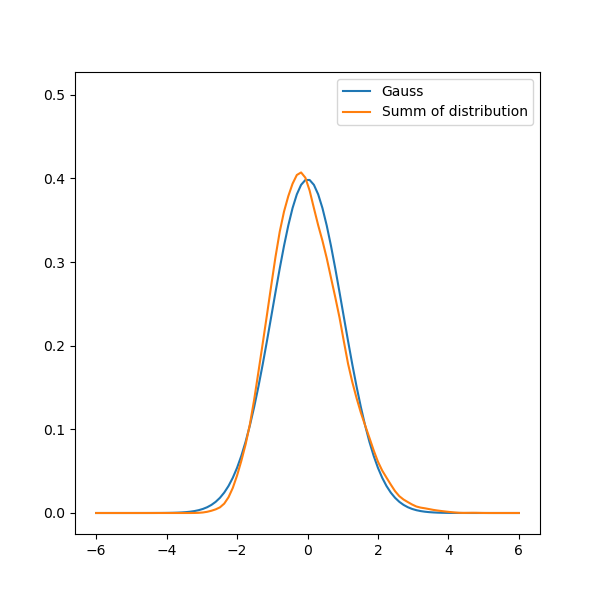

interactive(children=(IntSlider(value=2, description='N', max=60, min=1), Output()), _dom_classes=('widget-int…

In [19]:
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy
import scipy.stats as ss
import seaborn as sns
import ipywidgets as widgets
import numpy as np

fig = plt.figure(figsize=[6, 6])
ax = plt.gca()

size = 10000

lambda_ = 0.1
scale = 1 / lambda_
expon = ss.expon(scale=scale)
        
x = np.linspace(-6, 6, 100)
gauss = ss.norm(loc=0, scale=1)
y = gauss.pdf(x)


def get_rvs(N):
    summe = expon.rvs(size=(size, N)).sum(axis=1)
    mu = summe.mean()
    sigma = summe.std()
    summe = (summe - mu) / sigma
    return summe

def get_y2(N):
    summe = get_rvs(N)
    kernel = ss.gaussian_kde(summe)
    return kernel(x)
start = 2

y2 = get_y2(start)
ax.plot(x, y, label="Gauss")
line, = ax.plot(x, y2, label="Summ of distribution")
ax.legend()


def update_plot(N):
    line.set_ydata(get_y2(N))
    fig.canvas.draw_idle()
    #plt.show()
    
#plt.show()

# links an IntSlider taking values between 1 and 3 to the update_plot function
widgets.interact(update_plot, N=widgets.IntSlider(
    value=start, min=1, max=60
));

<IPython.core.display.Javascript object>


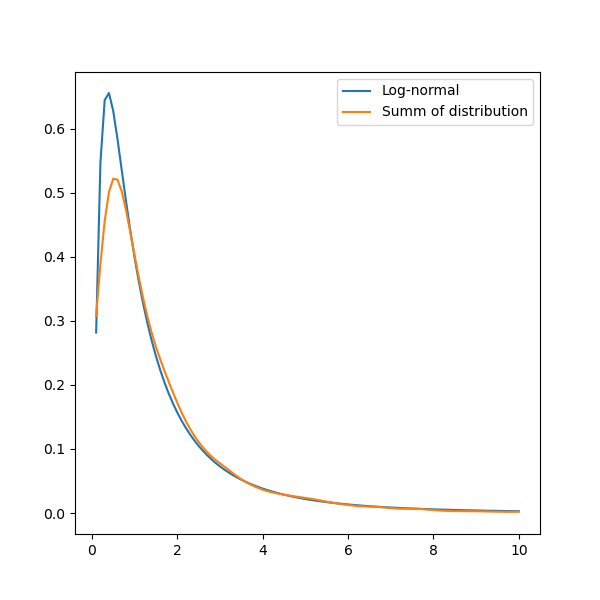

interactive(children=(IntSlider(value=2, description='N', max=60, min=1), Output()), _dom_classes=('widget-int…

In [33]:
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy
import scipy.stats as ss
import seaborn as sns
import ipywidgets as widgets
import numpy as np

fig = plt.figure(figsize=[6, 6])
ax = plt.gca()

size = 10000

lambda_ = 0.001
scale = 1 / lambda_
expon = ss.expon(scale=scale)
        
eps = 1e-1
x = np.linspace(eps, 10, 100)
lognorm = ss.lognorm(scale=1, s=1)
y = lognorm.pdf(x)


def get_rvs(N):
    summe = expon.rvs(size=(size, N)).prod(axis=1)
    
    gsd = ss.gstd(summe)
    b = 1 / np.log(gsd)
    
    summe = summe ** b
    
    median = np.median(summe)
    a = 1 / median
    
    return a * summe

def get_y2(N):
    summe = get_rvs(N)
    kernel = ss.gaussian_kde(summe)
    return kernel(x)
start = 2

y2 = get_y2(start)
ax.plot(x, y, label="Log-normal")
line, = ax.plot(x, y2, label="Summ of distribution")
ax.legend()


def update_plot(N):
    line.set_ydata(get_y2(N))
    fig.canvas.draw_idle()
    #plt.show()
    
#plt.show()

# links an IntSlider taking values between 1 and 3 to the update_plot function
widgets.interact(update_plot, N=widgets.IntSlider(
    value=start, min=1, max=60
));